In [1]:
import abkhazia
import pywrapfst as fst

In [2]:
# Buid symbol input tables for phones and words
# Index 0 for the epsilon symbol
# &#949; == epsilon
phone_table = fst.SymbolTable(name='phones')
word_table = fst.SymbolTable(name='words')
fr_word_table = fst.SymbolTable(name='upper_case_words')
phones = ['<epsilon>','d','ey','ae','t','dx','ax','ɒ','b','ɪ','g']
words = ['<epsilon>','data','dobby','big','very']
fr_words = ['<epsilon>','donnees','dobby','tres','large']
for idx,phone in enumerate(phones):
    phone_table.add_symbol(symbol=phone,key=idx)
    print phone_table.find(idx)

for idx,word in enumerate(words):
    word_table.add_symbol(symbol=word,key=idx)
    print word_table.find(idx)

for idx,word in enumerate(fr_words):
    fr_word_table.add_symbol(symbol=word,key=idx)
    print fr_word_table.find(idx)

<epsilon>
d
ey
ae
t
dx
ax
ɒ
b
ɪ
g
<epsilon>
data
dobby
big
very
<epsilon>
donnees
dobby
tres
large


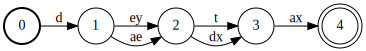

In [3]:
# Feed to a compiler the arcs, with accepted symbols
pronounciation_lexicon_acceptor_compiler = fst.Compiler()
print >> pronounciation_lexicon_acceptor_compiler, "0 1 1 1"
print >> pronounciation_lexicon_acceptor_compiler, "1 2 2 2"
print >> pronounciation_lexicon_acceptor_compiler, "1 2 3 3"
print >> pronounciation_lexicon_acceptor_compiler, "2 3 4 4"
print >> pronounciation_lexicon_acceptor_compiler, "2 3 5 5"
print >> pronounciation_lexicon_acceptor_compiler, "3 4 6 6"
## Final state
print >> pronounciation_lexicon_acceptor_compiler, "4"
fsa_data = pronounciation_lexicon_acceptor_compiler.compile()
fsa_data.set_input_symbols(phone_table)

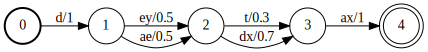

In [4]:
fsa_data.draw('graphs/fsa_acceptor.dot')
pronounciation_lexicon_acceptor_compiler = fst.Compiler()
print >> pronounciation_lexicon_acceptor_compiler, "0 1 1 1 1"
print >> pronounciation_lexicon_acceptor_compiler, "1 2 2 2 0.5"
print >> pronounciation_lexicon_acceptor_compiler, "1 2 3 3 0.5"
print >> pronounciation_lexicon_acceptor_compiler, "2 3 4 4 0.3"
print >> pronounciation_lexicon_acceptor_compiler, "2 3 5 5 0.7"
print >> pronounciation_lexicon_acceptor_compiler, "3 4 6 6 1"
## Final state
print >> pronounciation_lexicon_acceptor_compiler, "4"
wfsa_data = pronounciation_lexicon_acceptor_compiler.compile()
wfsa_data.set_input_symbols(phone_table)

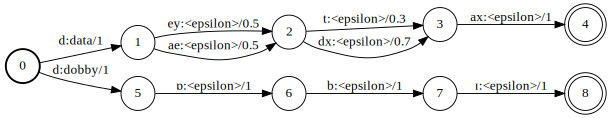

In [5]:
wfsa_data.draw('graphs/wfsa_acceptor.dot')
pronounciation_lexicon_tranducer_compiler = fst.Compiler()
# 'data' path
print >> pronounciation_lexicon_tranducer_compiler, "0 1 1 1 1"
print >> pronounciation_lexicon_tranducer_compiler, "1 2 2 0 0.5"
print >> pronounciation_lexicon_tranducer_compiler, "1 2 3 0 0.5"
print >> pronounciation_lexicon_tranducer_compiler, "2 3 4 0 0.3"
print >> pronounciation_lexicon_tranducer_compiler, "2 3 5 0 0.7"
print >> pronounciation_lexicon_tranducer_compiler, "3 4 6 0 1"
# 'dobby' path
print >> pronounciation_lexicon_tranducer_compiler, "0 5 1 2 1"
print >> pronounciation_lexicon_tranducer_compiler, "5 6 7 0 1"
print >> pronounciation_lexicon_tranducer_compiler, "6 7 8 0 1"
print >> pronounciation_lexicon_tranducer_compiler, "7 8 9 0 1"

## Final states
print >> pronounciation_lexicon_tranducer_compiler, "4"
print >> pronounciation_lexicon_tranducer_compiler, "8"

wfst_data = pronounciation_lexicon_tranducer_compiler.compile()
wfst_data.set_input_symbols(phone_table)
wfst_data.set_output_symbols(word_table)
wfst_data

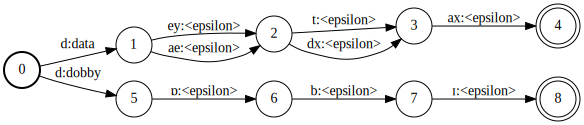

In [6]:
wfst_data.draw('graphs/wfst_transducer.dot')
pronounciation_lexicon_tranducer_compiler = fst.Compiler()
# 'data' path
print >> pronounciation_lexicon_tranducer_compiler, "0 1 1 1 "
print >> pronounciation_lexicon_tranducer_compiler, "1 2 2 0 "
print >> pronounciation_lexicon_tranducer_compiler, "1 2 3 0 "
print >> pronounciation_lexicon_tranducer_compiler, "2 3 4 0 "
print >> pronounciation_lexicon_tranducer_compiler, "2 3 5 0 "
print >> pronounciation_lexicon_tranducer_compiler, "3 4 6 0 "
# 'dobby' path
print >> pronounciation_lexicon_tranducer_compiler, "0 5 1 2 "
print >> pronounciation_lexicon_tranducer_compiler, "5 6 7 0 "
print >> pronounciation_lexicon_tranducer_compiler, "6 7 8 0 "
print >> pronounciation_lexicon_tranducer_compiler, "7 8 9 0 "

## Final states
print >> pronounciation_lexicon_tranducer_compiler, "4"
print >> pronounciation_lexicon_tranducer_compiler, "8"

fst_data = pronounciation_lexicon_tranducer_compiler.compile()
fst_data.set_input_symbols(phone_table)
fst_data.set_output_symbols(word_table)
fst_data

In [7]:
fst_data.draw('graphs/fst_transducer.dot')

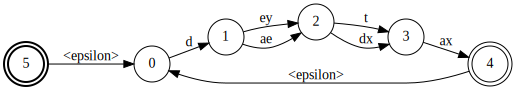

In [8]:
fsa_data_closure = fsa_data.copy()
fsa_data_closure.closure()

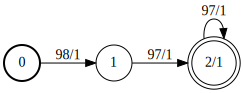

In [9]:
fsa_data_closure.draw('graphs/fsa_closure.dot')
# Another way to code fsts in python
# First fst
f = fst.Fst()
f.reserve_states(3)  # Optional.
s = f.add_state()
f.set_start(s)
n = f.add_state()
f.reserve_arcs(s, 1)  # Optional.
f.add_arc(s, fst.Arc(98, 98, 1, n))
s = n
n = f.add_state()
f.reserve_arcs(s, 1)  # Optional.
f.add_arc(s, fst.Arc(97, 97, 1, n))
f.reserve_arcs(n, 1)  # Optional.
f.add_arc(n, fst.Arc(97, 97, 1, n))
f.set_final(n, 1)
# f.verify()  # Checks FST's sanity.
# Second
f

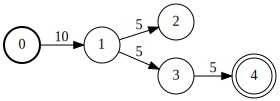

In [10]:
f.draw('graphs/simple_wfsa.dot')
# Now unweighted arcs
f2 = fst.Fst()
f2.reserve_states(5)  # Optional.
s = f2.add_state()
f2.set_start(s)
n = f2.add_state()
f2.reserve_arcs(s, 1)  # Optional.
f2.add_arc(s, fst.Arc(10, 10, 0, n))
s = n
n = f2.add_state()
f2.reserve_arcs(s, 1)  # Optional.
f2.add_arc(s, fst.Arc(5, 5, 0, n))
f2.reserve_arcs(n, 1)  # Optional.
n = f2.add_state()
f2.reserve_arcs(s, 1)  # Optional.
f2.add_arc(s, fst.Arc(5, 5, 0, n))
f2.reserve_arcs(n, 1)  # Optional.
s = n
n = f2.add_state()
f2.reserve_arcs(s, 1)  # Optional.
f2.add_arc(s, fst.Arc(5, 5, 0, n))
f2.reserve_arcs(n, 1)  # Optional.
f2.set_final(n, 0)


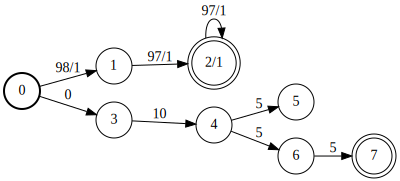

In [11]:
f2.draw('graphs/simple_wfsa2.dot')
f_union_f2 = f.copy()
f_union_f2.union(f2)

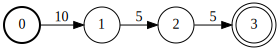

In [12]:
# To do the difference between A - B, you need A to be an acceptor, B to an unweighted, epsilon-free, deterministic acceptor.
f2_deterministic = f2.copy()
f2_deterministic = fst.determinize(f2_deterministic)
f2_deterministic

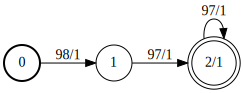

In [13]:
fst.difference(f_union_f2,f2_deterministic)

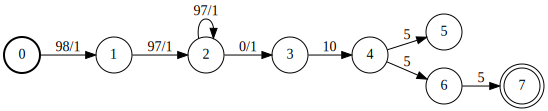

In [14]:
f_union_f2.draw('graphs/wfsa_union.dot')
f_concat_f2 = f.copy()
f_concat_f2.concat(f2)

In [15]:
f_concat_f2.draw('graphs/wfsa_concat.dot')

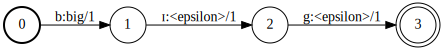

In [16]:
pronounciation_lexicon_tranducer_compiler = fst.Compiler()
# 'big' path
print >> pronounciation_lexicon_tranducer_compiler, "0 1 8 3 1"
print >> pronounciation_lexicon_tranducer_compiler, "1 2 9 0 1"
print >> pronounciation_lexicon_tranducer_compiler, "2 3 10 0 1"


## Final states
print >> pronounciation_lexicon_tranducer_compiler, "3"

big_wfst_data = pronounciation_lexicon_tranducer_compiler.compile()
big_wfst_data.set_input_symbols(phone_table)
big_wfst_data.set_output_symbols(word_table)

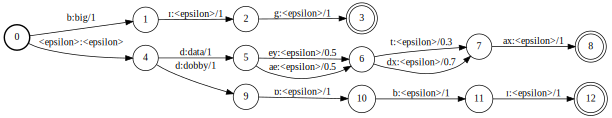

In [17]:
pronouciation_dict = big_wfst_data.copy()
pronouciation_dict.union(wfst_data)


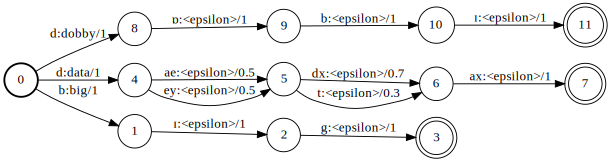

In [18]:
pronouciation_dict.rmepsilon()

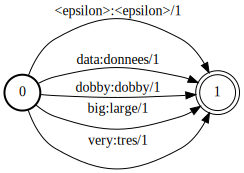

In [19]:
fr_model_tranducer_compiler = fst.Compiler(acceptor=False)
# upper_case model


print >> fr_model_tranducer_compiler, "0 1 0 0 1"
print >> fr_model_tranducer_compiler, "0 1 1 1 1"
print >> fr_model_tranducer_compiler, "0 1 2 2 1"
print >> fr_model_tranducer_compiler, "0 1 3 4 1"
print >> fr_model_tranducer_compiler, "0 1 4 3 1"
## Final states
print >> fr_model_tranducer_compiler, "1"

fr_wfst_data = fr_model_tranducer_compiler.compile()
fr_wfst_data.set_input_symbols(word_table)
fr_wfst_data.set_output_symbols(fr_word_table)

In [20]:
fr_wfst_data.draw('graphs/fr_wfst_dict.dot')
full_model = fst.compose(pronouciation_dict,fr_wfst_data)

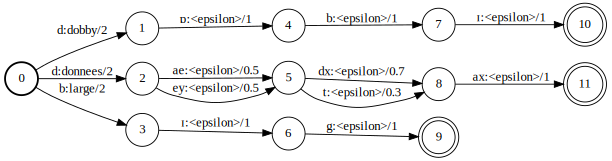

In [21]:
full_model

In [22]:
full_model.draw('graphs/compose_result.dot')

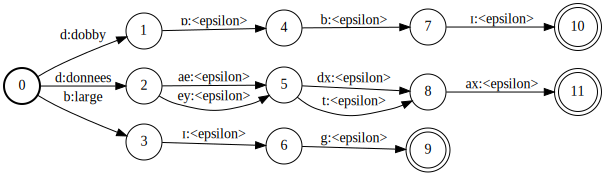

In [23]:
unweighted_full_model = full_model.copy()
#### fst.arcmap is your friend
fst.arcmap(unweighted_full_model,mt='rmweight')

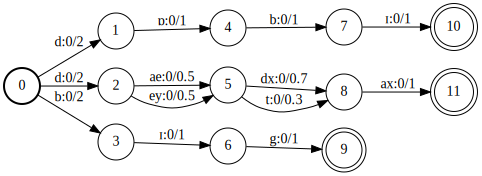

In [24]:
fst.arcmap(unweighted_full_model,mt='output_epsilon')

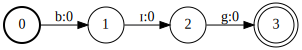

In [25]:
fst.arcmap(fst.arcmap(big_wfst_data,mt='output_epsilon'),mt='rmweight')

In [26]:
help(fst.statemap)

Help on built-in function statemap in module pywrapfst:

statemap(...)
    state_map(ifst, map_type)
    
    Constructively applies a transform to all states.
    
    This operation transforms each state according to the requested map type.
    Note that currently, only one state-mapping operation is supported.
    
    Args:
      ifst: The input FST.
      mt: A string matching a known mapping operation; one of: "arc_sum" (sum
          weights of identically-labeled multi-arcs), "arc_unique" (deletes
          non-unique identically-labeled multi-arcs).
    
    Returns:
      An FST with states remapped.
    
    Raises:
      FstArgError: Unknown map type.
    
    See also: `arcmap`.

